In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
# load dataset

# l= ["f1","f2","f3","f4","f5","f6","f7","f8","label"]
df= pd.read_csv("C:/Users/mkahs/REPOSITORY/DeepLearning---Natural-Language-Processing/Arup.csv", header=None, names=["f1","f2","f3","f4","f5","f6","f7","f8","label"])
# df = pd.ExcelFile(r"C:/Users/mkahs/REPOSITORY/DeepLearning---Natural-Language-Processing/Residential-Building-Data-Set.xlsx")
df.head()


train = df.loc[0:629]
# print(len(train))
# train.head()
Xtrain = train.iloc[:,0:8]
Ytrain = train.iloc[:,8]
Xtrain.reset_index(drop=True, inplace=True)
# Ytrain.head()


test = df.loc[630:944]
# print(len(test))
test.tail()
Xtest = test.iloc[:,0:8]
Ytest = test.iloc[:,8]
Xtest.reset_index(drop=True, inplace=True)
# Ytest.head()
print(Xtest)



scaler = StandardScaler()

X_train = scaler.fit_transform(Xtrain.as_matrix())
y_train = scaler.fit_transform(Ytrain.as_matrix().reshape(-1, 1))

X_test = scaler.fit_transform(Xtest.as_matrix())
y_test = scaler.fit_transform(Ytest.as_matrix().reshape(-1, 1))



# Defines "deep" model and its structure
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='linear'))
# model.add(Dense(2, activation='linear'))
model.add(Dense(1,))
model.compile(Adam(lr=0.003), 'mean_squared_error')

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.2,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])


y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of training and testing data
# print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

plt.plot(y_test,'bo',label='Actual')
plt.plot(y_test_pred,'r',label='Predicted')

print(Ytest)
print(scaler.inverse_transform(y_test_pred))

# print("The actual value: %.2f  and the predicted value: %.2f" %(Ytest, scaler.inverse_transform(y_test_pred)))

Using TensorFlow backend.


           f1        f2        f3        f4        f5        f6        f7  \
0   -1.134372 -1.040787 -2.918179 -2.343683 -2.122019 -1.770788 -1.826998   
1   -1.083615 -0.984909 -2.350725 -1.927981 -1.910119 -1.642958 -1.699413   
2   -1.040667 -0.930662 -1.866428 -1.591406 -1.736889 -1.539434 -1.587129   
3   -1.016767 -0.906662 -1.650327 -1.469462 -1.708109 -1.454863 -1.508497   
4   -1.016226 -0.901794 -1.881274 -1.525240 -1.648155 -1.491204 -1.532957   
..        ...       ...       ...       ...       ...       ...       ...   
310  1.542389  1.324790  1.159979  1.194362  1.575499  0.483800  0.662278   
311  1.627053  1.395473  1.572554  1.263384  1.573165  0.420169  0.610495   
312  1.619996  1.389791  1.579942  1.266703  1.607932  0.396298  0.598001   
313  1.642734  1.408490  1.625269  1.287326  1.650222  0.419695  0.624853   
314  1.662778  1.425574  1.682732  1.323510  1.680046  0.442045  0.648468   

           f8  
0   -1.768924  
1   -1.632332  
2   -1.513628  
3   -1.4317

C:\Users\mkahs\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\mkahs\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\mkahs\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\mkahs\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.





Epoch 00025: early stopping
The R2 score on the Test set is:	0.938
630     29.102066
631     37.723714
632     46.305973
633     54.852359
634     56.625521
          ...    
940    214.124102
941    214.610637
942    215.056806
943    215.499522
944    215.942238
Name: label, Length: 315, dtype: float64
[[ 41.1907  ]
 [ 51.4911  ]
 [ 60.216465]
 [ 64.395706]
 [ 62.05099 ]
 [ 69.80214 ]
 [ 66.52009 ]
 [ 67.81262 ]
 [ 66.662346]
 [ 73.33808 ]
 [ 69.89783 ]
 [ 71.29018 ]
 [ 68.690575]
 [ 74.53768 ]
 [ 75.49128 ]
 [ 77.72033 ]
 [ 79.17787 ]
 [ 80.978745]
 [ 72.44768 ]
 [ 73.167534]
 [ 77.73487 ]
 [ 84.9252  ]
 [ 86.347336]
 [ 88.52901 ]
 [ 90.49411 ]
 [ 91.594406]
 [ 92.63553 ]
 [ 94.95355 ]
 [ 94.55347 ]
 [ 95.67542 ]
 [ 81.12135 ]
 [ 82.488075]
 [ 80.53309 ]
 [ 86.24039 ]
 [ 88.99109 ]
 [ 88.85004 ]
 [ 91.19047 ]
 [ 91.85994 ]
 [ 92.50914 ]
 [ 92.67005 ]
 [ 94.44049 ]
 [ 97.373474]
 [ 97.191986]
 [ 97.885735]
 [ 98.386314]
 [ 98.16087 ]
 [ 83.11366 ]
 [ 98.31852 ]
 [ 98.83049 ]
 [ 98

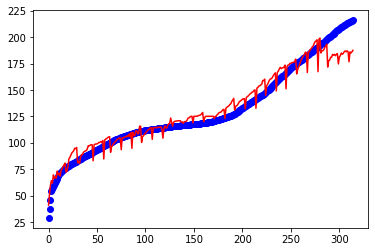

In [2]:
YTlist= list(Ytest)
# print(YTlist)
plt.plot(YTlist,'bo',label='Actual')
plt.plot(scaler.inverse_transform(y_test_pred),'r',label='Predicted')